# 1
Utilize o conjunto de dados [Go To College Dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) ou um conjunto de dados de **classificação supervisionada** de sua escolha.

In [344]:
import pandas as pd
import seaborn as sns

In [345]:
data = pd.read_csv('data.csv')
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


# 2
Realize uma Análise Exploratória de Dados.

In [346]:
df = data.copy()
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [347]:
list(df.columns)

['type_school',
 'school_accreditation',
 'gender',
 'interest',
 'residence',
 'parent_age',
 'parent_salary',
 'house_area',
 'average_grades',
 'parent_was_in_college',
 'will_go_to_college']

In [348]:
print(f"O conjunto de dados possui {len(df)} amostras e {len(df.columns)} colunas")

O conjunto de dados possui 1000 amostras e 11 colunas


In [349]:
# Para ver a quantidade de dados sem informação:
df.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

Não há dados sem informação.

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


<AxesSubplot:xlabel='type_school', ylabel='count'>

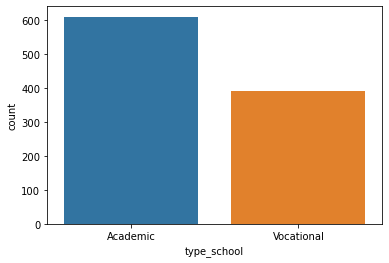

In [351]:
sns.countplot(x='type_school',data=df)

O tipo de escola que os alunos mais frequentam é a Academic, a Vocational é o tipo menos frequente.

In [352]:
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

<AxesSubplot:xlabel='residence', ylabel='Count'>

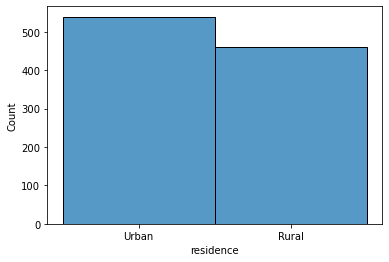

In [353]:
sns.histplot(data=df,x='residence')

A maioria das pessoas moram em área urbana, porem muitos moram em área rural.

<AxesSubplot:xlabel='will_go_to_college', ylabel='count'>

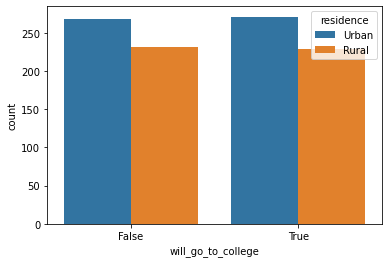

In [354]:
sns.countplot(data=df, x='will_go_to_college', hue='residence')

In [355]:
df[['residence','will_go_to_college']].value_counts()

residence  will_go_to_college
Urban      True                  271
           False                 268
Rural      False                 232
           True                  229
dtype: int64

O gráfico mostra que particamente metade dos alunos tanto de área urbana, quanto de área rural não estão indo à faculdade.

# 4
Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).

In [356]:
from sklearn.model_selection import train_test_split
import sys
from sklearn.preprocessing import LabelEncoder
labelenconder = LabelEncoder()

In [357]:
df['type_school_encoded'] = labelenconder.fit_transform(df['type_school'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0


In [358]:
df['school_accreditation_encoded'] = labelenconder.fit_transform(df['school_accreditation'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1


In [359]:
df['gender_encoded'] = labelenconder.fit_transform(df['gender'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded,gender_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1,0
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0,0
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1,0
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1,1


In [360]:
df['interest_encoded'] = labelenconder.fit_transform(df['interest'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded,gender_encoded,interest_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0,1,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0,1,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1,0,4
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1,1,4
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0,0,4
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1,0,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0,1,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1,1,3


In [361]:
df['residence_encoded'] = labelenconder.fit_transform(df['residence'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded,gender_encoded,interest_encoded,residence_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0,1,1,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0,1,1,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1,0,4,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1,1,4,0
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0,0,4,0
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1,0,1,0
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0,1,1,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1,1,3,0


In [362]:
df['parent_was_in_college_encoded'] = labelenconder.fit_transform(df['parent_was_in_college'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded,gender_encoded,interest_encoded,residence_encoded,parent_was_in_college_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0,1,1,1,0
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0,1,1,1,0
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1,0,4,1,0
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1,1,4,0,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0,0,4,0,1
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1,0,1,0,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0,1,1,1,0
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1,1,3,0,1


In [363]:
df['will_go_to_college_encoded'] = labelenconder.fit_transform(df['will_go_to_college'])
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_encoded,school_accreditation_encoded,gender_encoded,interest_encoded,residence_encoded,parent_was_in_college_encoded,will_go_to_college_encoded
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,0,0,1,1,1,0,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,0,0,1,1,1,0,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,0,1,0,4,1,0,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,1,1,1,4,0,1,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,0,0,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True,1,0,0,4,0,1,1
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True,0,1,0,1,0,1,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True,1,0,1,1,1,0,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True,0,1,1,3,0,1,1


In [364]:
y = df['will_go_to_college_encoded'].to_list()
y

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [365]:
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'will_go_to_college',
       'type_school_encoded', 'school_accreditation_encoded', 'gender_encoded',
       'interest_encoded', 'residence_encoded',
       'parent_was_in_college_encoded', 'will_go_to_college_encoded'],
      dtype='object')

In [366]:
X = df[['type_school_encoded', 'school_accreditation_encoded', 'gender_encoded', 'interest_encoded',
       'residence_encoded', 'parent_was_in_college_encoded',
       'will_go_to_college_encoded']]
X.head()

,type_school_encoded,school_accreditation_encoded,gender_encoded,interest_encoded,residence_encoded,parent_was_in_college_encoded,will_go_to_college_encoded
0,0,0,1,1,1,0,1
1,0,0,1,1,1,0,1
2,0,1,0,4,1,0,1
3,1,1,1,4,0,1,1
4,0,0,0,4,1,0,0


In [367]:
len(X)

1000

In [368]:
clf = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf

[     type_school_encoded  school_accreditation_encoded  gender_encoded  \
 567                    0                             1               1   
 759                    0                             0               0   
 537                    0                             1               0   
 209                    1                             0               0   
 757                    0                             1               0   
 ..                   ...                           ...             ...   
 91                     1                             1               1   
 285                    0                             0               1   
 780                    1                             1               0   
 333                    1                             1               1   
 508                    0                             1               0   
 
      interest_encoded  residence_encoded  parent_was_in_college_encoded  \
 567                 3

In [369]:
len(X_train)

600

In [370]:
len(X_test)

400

In [371]:
len(y)

1000

In [372]:
len(y_train)

600

In [373]:
len(y_test)

400

# 5

Realize a classificação utilizando o KNN.

In [374]:
from sklearn.neighbors import KNeighborsClassifier

In [375]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [376]:
y_pred = clf.predict(X_test)

In [377]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [378]:
y_test

[1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


# 6

Calcule a acurácia, F1-score, recall, precision.

In [379]:
from sklearn.metrics import recall_score,precision_score, f1_score, accuracy_score, classification_report

Acurácia:

In [380]:
accuracy_score(y_test,y_pred)

0.975

F1-score:

In [381]:
f1_score(y_test,y_pred)

0.9757281553398058

Recall:

In [382]:
recall_score(y_test,y_pred)

0.9617224880382775

Precision:

In [383]:
precision_score(y_test,y_pred)

0.9901477832512315

# 7

Exiba o [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [384]:
from sklearn.metrics import classification_report

In [385]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       191
           1       0.99      0.96      0.98       209

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



# 8

Plot a [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay). Outra biblioteca interessante para o plot é a seaborn [exemplo de uso](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea).

In [386]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [387]:
matriz = confusion_matrix(y_test, y_pred, labels=clf.classes_)
matriz

array([[189,   2],
       [  8, 201]], dtype=int64)

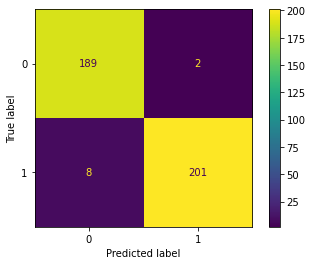

In [388]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=clf.classes_)
disp.plot()
plt.show()

# 9

Realize vários experimentos. Modifique a quantidade de vizinhos (parametro n_neighbors), e crie um plot (k vs acurácia).

Para k=5  --- acuracia = 0.89

Para k=7  --- acuracia = 0.88

Para k=10 --- acuracia = 0.94

In [389]:
import numpy as np
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [390]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

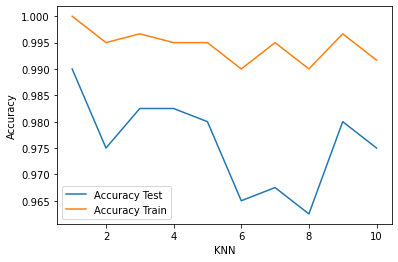

In [391]:
plt.plot(neighbors, test_accuracy, label = 'Accuracy Test')
plt.plot(neighbors, train_accuracy, label = 'Accuracy Train')
plt.legend()
plt.xlabel('KNN')
plt.ylabel('Accuracy')
plt.show()

# 10

Realize vários experimentos. Modifique a quantidade de dados para treino/teste, e crie um plot (%treino vs acurácia).

In [392]:
holdout_list =[0.9, 0.4, 0.3, 0.25, 0.1]
accuracy_list =[]
for i in holdout_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)

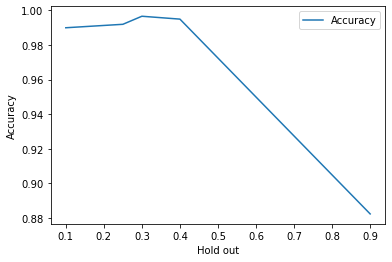

In [393]:
plt.plot(holdout_list, accuracy_list, label = 'Accuracy')
plt.legend()
plt.xlabel('Hold out')
plt.ylabel('Accuracy')
plt.show()

In [394]:
import pickle

In [395]:
with open('clf.pkl', 'wb') as files:
    pickle.dump(clf, files)

In [396]:
with open('X.pkl', 'wb') as files:
    pickle.dump(X, files)

In [397]:
with open('y.pkl', 'wb') as files:
    pickle.dump(y, files)